In [2]:
%matplotlib notebook


In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib import collections  as mc
import numpy as np
from matplotlib.widgets import Slider


Bad key savefig.frameon in file /home/david/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /home/david/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /home/david/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get an upd

In [2]:
import sys
sys.path.append('../VideoPose3D/')
from custom_run import *

In [5]:
model = get_model('../VideoPose3D/checkpoint/pretrained_h36m_detectron_coco.bin')

In [96]:
joints = predict_from_dataset(model, '../VideoPose3D/data_federer_openpose_interpolated.npz')

In [6]:
joints = predict_from_dataset(model, '../VideoPose3D/data/data_2d_custom_federer.npz')

In [122]:
joints = predict_from_dataset(model, '../VideoPose3D/data_test_federer.npz')

In [19]:
joints = np.load('../VideoPose3D/joints.npy')

In [18]:
from common import *

In [3]:
dataset = CustomDataset('../VideoPose3D/data/data_2d_custom_federer.npz')
for subject in dataset.cameras():
    if 'orientation' in dataset.cameras()[subject][0]:
        rot = dataset.cameras()[subject][0]['orientation']
        break

In [4]:
rot

array([ 0.14070565, -0.15007018, -0.7552408 ,  0.62232804], dtype=float32)

In [20]:
joints_world = camera_to_world(joints, R=rot, t=0)
# joints_world[:, :, 2] -= np.min(joints_world[:, :, 2])

In [21]:
body_parts = {
    'nose': 9,
    'top_head': 10,
    'left_shoulder': 11,
    'right_shoulder': 14,
    'left_elbow': 12,
    'right_elbow': 15,
    'left_wrist': 13,
    'right_wrist': 16,
    'left_hip': 4,
    'right_hip': 1,
    'middle_hip':0,
    'middle_body': 7,
    'left_knee': 5,
    'right_knee': 2,
    'neck': 8,
    'left_ankle':6,
    'right_ankle':3
}

In [22]:
# def x(vector):
#     return vector[0]

# def y(vector):
#     return vector[2]

# def z(vector):
#     return -vector[1]

def x(vector):
    return vector[0]

def y(vector):
    return vector[1]

def z(vector):
    return vector[2]

def segment(joints, part1, part2):
    idx1 = body_parts[part1]
    idx2 = body_parts[part2]
    
    start = joints[idx1]
    end = joints[idx2]
    
    return [x(start), x(end)], [y(start), y(end)], [z(start), z(end)]

def vector(point1, point2):
    return (x(point2-point1), y(point2-point1), z(point2-point1))

def point_of_part(joints, part):
    return joints[body_parts[part]]

In [23]:
segments_to_plot = [
 ('right_wrist', 'right_elbow'), ('right_elbow', 'right_shoulder'), ('right_shoulder', 'neck'),
 ('left_knee', 'left_hip'), ('right_knee', 'right_hip'), ('left_hip', 'middle_hip'), 
 ('right_hip', 'middle_hip'), ('left_wrist', 'left_elbow'), ('left_elbow', 'left_shoulder'),
 ('middle_hip', 'middle_body'), ('middle_body', 'neck'), ('left_shoulder', 'neck'),
 ('top_head', 'nose'), ('nose', 'neck'), ('left_ankle', 'left_knee'), ('right_ankle', 'right_knee')
]


def plot_pose(joints):
    
    plt.ioff()
    fig = plt.figure(figsize=(8, 6))
    ax = Axes3D(fig)

    radius = 1.7

    ax.set_xlim3d([-radius/2, radius/2])
    ax.set_zlim3d([-radius/2, radius/2])
    ax.set_ylim3d([-radius/2, radius/2])
    ax.dist = 7.5

    ax.set_zlabel('Z')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.view_init(elev=15., azim=-70)
    
    for (part1, part2) in segments_to_plot:
        c = 'red' if 'right' in part1 or 'right' in part2 else 'black'
        _x, _y, _z = segment(joints, part1, part2)
        ax.plot(_x, _y, _z, zdir='z', c=c)
        
        
    return fig


<IPython.core.display.Javascript object>


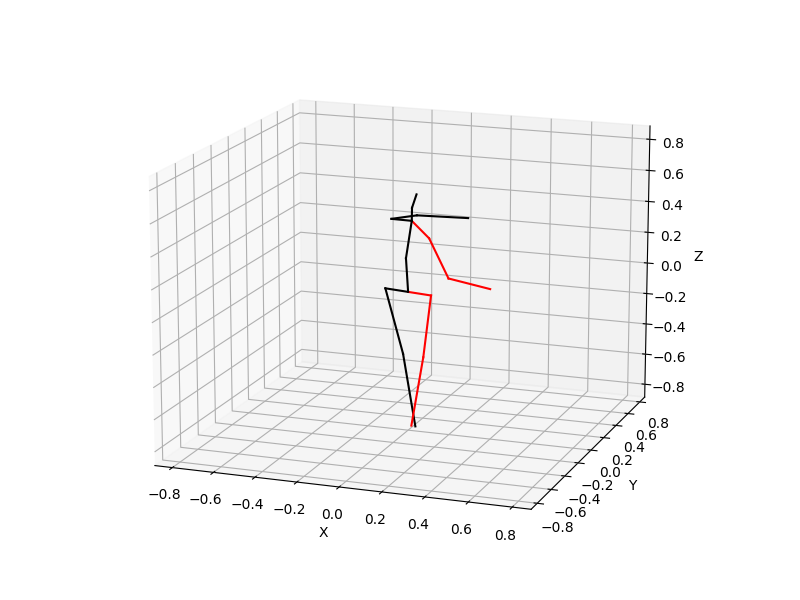

In [24]:
fig = plot_pose(joints_world[0])
fig.show()

<IPython.core.display.Javascript object>


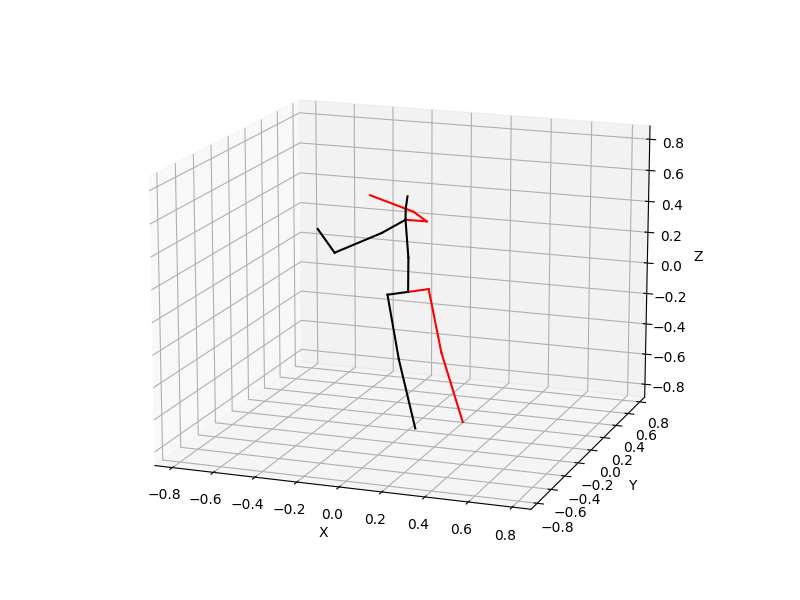

In [139]:
fig = plot_pose(joints_world[160])
fig.show()

<IPython.core.display.Javascript object>


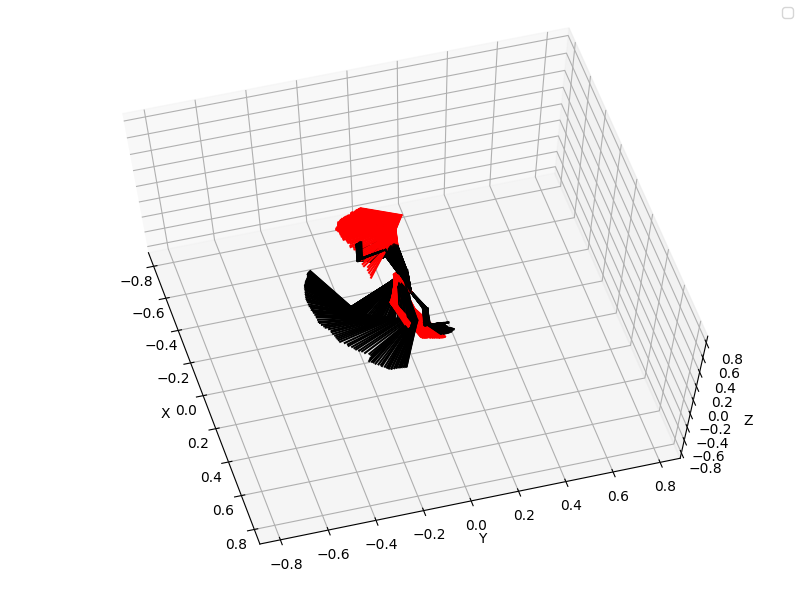

No handles with labels found to put in legend.


In [12]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)

radius = 1.7

ax.set_xlim3d([-radius/2, radius/2])
ax.set_zlim3d([-radius/2, radius/2])
ax.set_ylim3d([-radius/2, radius/2])

ax.set_zlabel('Z')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.view_init(elev=20., azim=-70)


colors = cm.rainbow(np.linspace(0, 1, 17))

# for i, joint in enumerate(joints[1]):
#     ax.scatter(x(joint), y(joint), z(joint), label=str(i), c=colors[i])
#     x_proj, y_proj, _ = proj3d.proj_transform(-joint[0],joint[2],-joint[1], ax.get_proj())
#     ax.annotate(str(i), (x_proj, y_proj))
    
#ax.plot([x(start), x(end)], [y(start), y(end)], [z(start), z(end)])
segments_to_plot = [
 ('right_wrist', 'right_elbow'), ('right_elbow', 'right_shoulder'), ('right_shoulder', 'neck'),
 ('left_knee', 'left_hip'), ('right_knee', 'right_hip'), ('left_hip', 'middle_hip'), 
 ('right_hip', 'middle_hip'), ('left_wrist', 'left_elbow'), ('left_elbow', 'left_shoulder'),
 ('middle_hip', 'middle_body'), ('middle_body', 'neck'), ('left_shoulder', 'neck'),
 ('top_head', 'nose'), ('nose', 'neck'), ('left_ankle', 'left_knee'), ('right_ankle', 'right_knee')
]

for j, joints_in_frame in enumerate(joints):  
    for (part1, part2) in segments_to_plot:
        c = 'red' if 'right' in part1 or 'right' in part2 else 'black'
        _x, _y, _z = segment(joints_in_frame, part1, part2)
        ax.plot(_x, _y, _z, c=c)
    
ax.legend()

In [13]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'"""
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0)) * 180/np.pi

In [14]:
def angle_evolution(joints, parts1, parts2):
    angles = []
    for joints_in_frame in joints:
        vec1 = vector(point_of_part(joints_in_frame, parts1[0]), point_of_part(joints_in_frame, parts1[1]))
        vec2 = vector(point_of_part(joints_in_frame, parts2[0]), point_of_part(joints_in_frame, parts2[1]))
        angle = angle_between(vec1, vec2)
        angles.append(angle)
    return angles, vec1, vec2

In [38]:
angles = []
for joints_in_frame in joints:
    vec_forearm = vector(point_of_part(joints_in_frame, 'right_wrist'), point_of_part(joints_in_frame, 'right_elbow'))
    vec_arm = vector(point_of_part(joints_in_frame, 'right_elbow'), point_of_part(joints_in_frame, 'right_shoulder'))
    angle = angle_between(vec_arm, vec_forearm)
    angles.append(angle)

<IPython.core.display.Javascript object>


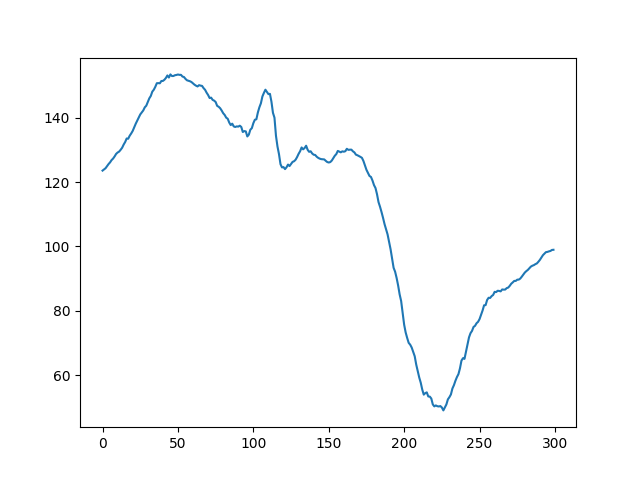

In [26]:
angles, vec1, vec2 = angle_evolution(joints, ('right_elbow', 'right_wrist'), ('right_elbow', 'right_shoulder'))

plt.plot(np.arange(len(angles)), angles)
plt.show()

<IPython.core.display.Javascript object>


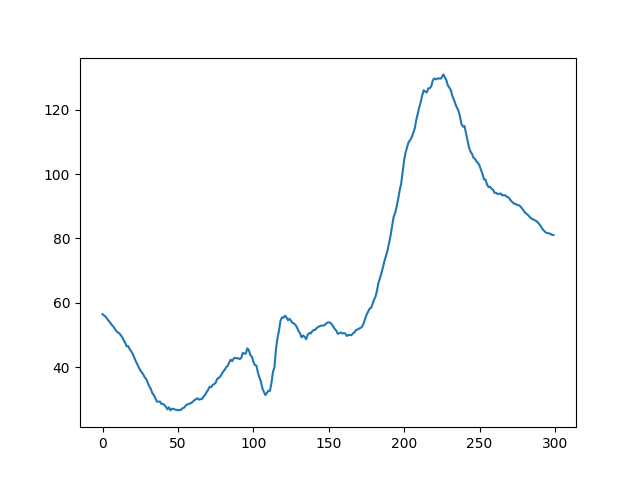

In [27]:
angles, vec1, vec2 = angle_evolution(joints, ('right_wrist', 'right_elbow'), ('right_elbow', 'right_shoulder'))

plt.plot(np.arange(len(angles)), angles)
plt.show()

<IPython.core.display.Javascript object>


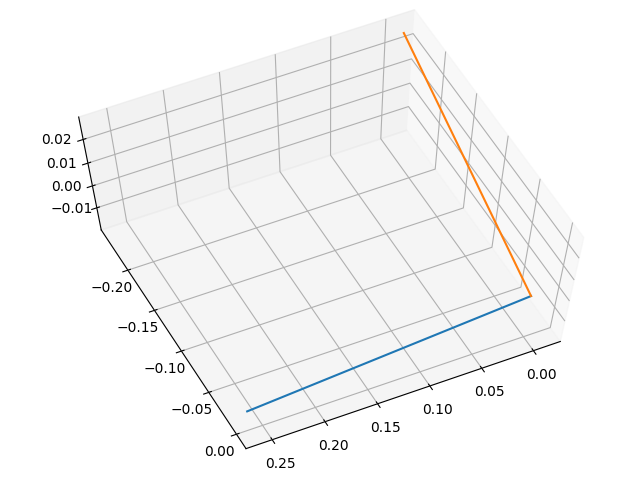

In [44]:
fig = plt.figure()
ax = Axes3D(fig)

ax.plot([0, vec_forearm[0]], [0, vec_forearm[1]], [0, vec_forearm[2]])
ax.plot([0, vec_arm[0]], [0, vec_arm[1]], [0, vec_arm[2]])

fig.show()

In [45]:
angles[0]

54.03014312749416

In [17]:
plt.ioff()

for i in range(len(joints)):
    fig = plot_pose(joints[i])
    fig.savefig('images/' + str(i) + '.png')
    plt.close(fig)